# Analisis Data untuk Meningkatkan Pendapatan Menggunakan A/B Testing

# Pendahuluan

Anda adalah seorang analis di sebuah toko daring besar. Anda bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan. Anda perlu memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya.

# Pra-Pemrosesan Data

In [1]:
#memuat semua library

import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


In [2]:
#memuat data

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
hypotheses


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [5]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [6]:
#memeriksa nilai duplikat

print('Data yang terduplikasi pada tabel visit yaitu sebanyak', visits.duplicated().sum())
print('Data yang terduplikasi pada tabel orders yaitu sebanyak', orders.duplicated().sum())
print('Data yang terduplikasi pada tabel hypotheses yaitu sebanyak', hypotheses.duplicated().sum())


Data yang terduplikasi pada tabel visit yaitu sebanyak 0
Data yang terduplikasi pada tabel orders yaitu sebanyak 0
Data yang terduplikasi pada tabel hypotheses yaitu sebanyak 0


In [7]:
#memeriksa nilai hilang

print('Data yang hilang pada tabel visit yaitu sebanyak', visits.isna().sum())
print('Data yang hilang pada tabel orders yaitu sebanyak', orders.isna().sum())
print('Data yang hilang pada tabel hypotheses yaitu sebanyak', hypotheses.isna().sum())


Data yang hilang pada tabel visit yaitu sebanyak date      0
group     0
visits    0
dtype: int64
Data yang hilang pada tabel orders yaitu sebanyak transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Data yang hilang pada tabel hypotheses yaitu sebanyak Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


# Analisa Data Eksploratif

## Memprioritaskan Hipotesis

Untuk memprioritaskan hipotesis, kita akan menggunakan metode ICE atau Impact, Confidence, dan Effort dan juga modifikasi 
dari metode ICE yaitu RICE dengan tambahan data Reach (R)


In [9]:
# pemrioritasan hipotesis dengan ice

hypotheses['ice'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses[['Hypothesis','ice']].sort_values(by='ice',ascending=False)

,Hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [10]:
# pemrioritasan hipotesis dengan rice

hypotheses['rice'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses[['Hypothesis','rice']].sort_values(by='rice',ascending=False)

,Hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [11]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ice,rice
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


* Metode **ICE** memilih **hipotesis 8, 0, 7, dan 6** sebagai hipotesis yang menjanjikan.
* Metode **RICE** memilih **hipotesis 7, 2, 0, dan 6** sebagai hipotesis yang menjanjikan. 
* Pada metode **ICE**, posisi pertama ditempati **hipotesis 8** namun pada metode **RICE**, **hipotesis 8** berada di **posisi ke-5** karena nilai **parameter Reach** hanya **1** yang berarti tidak banyak pengguna yang akan terpengaruh oleh pembaruan yang ingin kita perkenalkan
* Hipotesis 7 menempati posisi 1 pada RICE karena memiliki parameter Reach yang tinggi serta didukung parameter lainnya dengan nilai yang cukup tinggi

## Mengetahui pendapatan kumulatif berdasarkan kelompok

Untuk menghitung pendapatan kumulatif berdasarkan kelompok, kita akan melakukan pemfilteran nilai tanggal dan kelompok yang unik berdasarkan data `orders` terlebih dahulu.

In [12]:
# membuat array dengan tanggal dan kelompok yang unik

datesGroups = orders[['date','group']].drop_duplicates() 


Selanjutnya memisahkan data `orders` dan `visits` serta memfilter data yang tanggalnya kurang dari atau sama dengan tanggal elemen `datesGroups` dan kelompok ujinya sama seperti pada `datesGroups` kemudian kita akan mengagregasi nilai-nilainya seperti tanggal maksimumnya, jumlah pesanan dan ID unik pengguna, serta jumlah pembelian rata-rata.

In [13]:
# memfilter data untuk memperoleh data kumulatif pesanan dan kunjungan

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])


Setelah `ordersAggregated` dan `visitorsAggregated` dibuat, kita akan menggabungkan kedua tabelnya untuk memudahkan analisa data.

In [14]:
# menggabungkan data kumulatif pesanan dan kunjungan

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


Sekarang kita akan memisahkan data kumulatif berdasarkan kelompok dan harinya

In [15]:
# membuat data kumulatif per kelompok

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueA

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109
10,2019-08-06,9600.0,127
12,2019-08-07,11842.9,145
14,2019-08-08,13373.3,161
16,2019-08-09,16320.4,177
18,2019-08-10,19608.6,193


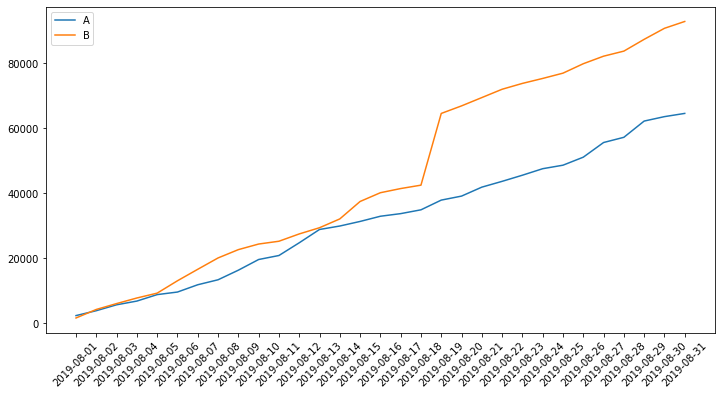

In [16]:
# visualisasi plot pendapatan kumulatif

fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
ax.legend()
plt.xticks(rotation=45)  
plt.show()

Ternyata pendapatan cenderung meningkat saat pengujian dan kita bisa melihat bahwa terdapat peningkatan yang cukup tajam di satu titik pada kelompok B. Hal ini kemungkinan disebabkan oleh pesanan yang sangat mahal ataupun pesanan dalam jumlah yang banyak. Sedangkan untuk peningkatan di kelompok A cenderung linier.

## Mengetahui ukuran pesanan rata-rata kumulatif berdasarkan kelompok

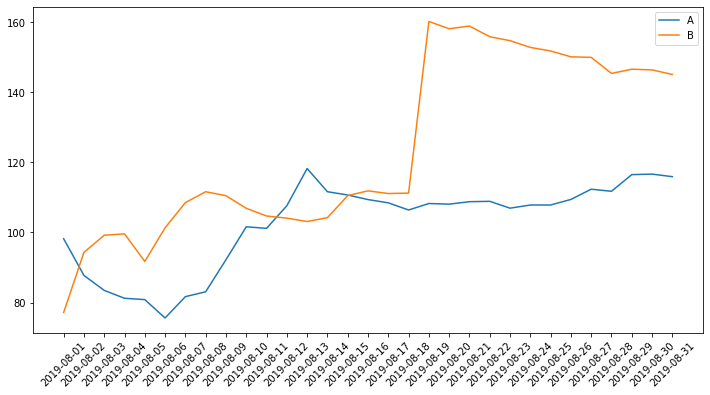

In [17]:
# ukuran pesanan rata-rata

fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
ax.legend()
plt.xticks(rotation=45)  
plt.show()

Jumlah pesanan rata-rata terlihat sangat berlawanan antara kedua kelompok dari awal hingga akhir pengujian. Lonjakan pada kelompok B ternyata disebabkan oleh adanya rata-rata 160 pesanan dalam 1 hari!

Selanjutnya kita memerlukan lebih banyak data terkait kelompok ini untuk menemukan jumlah pembelian rata-rata yang sebenarnya. Oleh karena itu kita akan membuat grafik perbedaan relatif untuk jumlah pembelian rata-rata.

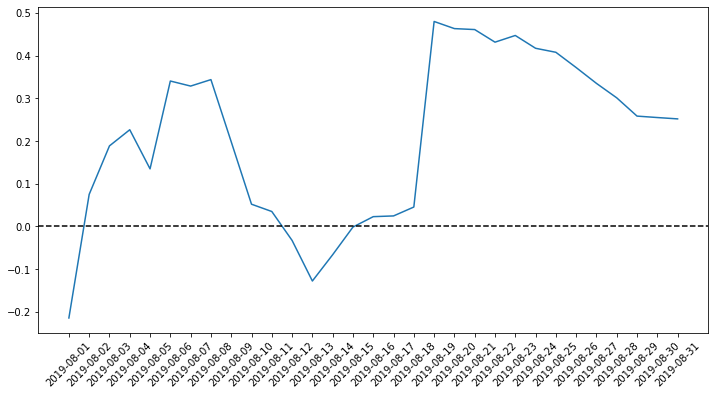

In [18]:
# menggabungkan data kedua kelompok 

fig, ax = plt.subplots(figsize=(12, 6)) 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
revenue_ratio = (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1

# membuat grafik perbedaan relatif untuk jumlah pembelian rata-rata

ax.plot(mergedCumulativeRevenue['date'], revenue_ratio)

# menambahkan sumbu X
ax.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)  
plt.show()


In [38]:
mergedCumulativeRevenue

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101
5,2019-08-06,9600.0,127,13069.3,129
6,2019-08-07,11842.9,145,16600.8,153
7,2019-08-08,13373.3,161,20088.6,180
8,2019-08-09,16320.4,177,22646.7,205
9,2019-08-10,19608.6,193,24367.1,228


Perbedaan antara segmen meningkat secara dramatis. Ini menandakan adanya pesanan berukuran besar dan outlier!

## Mengetahui tingkat konversi setiap kelompok

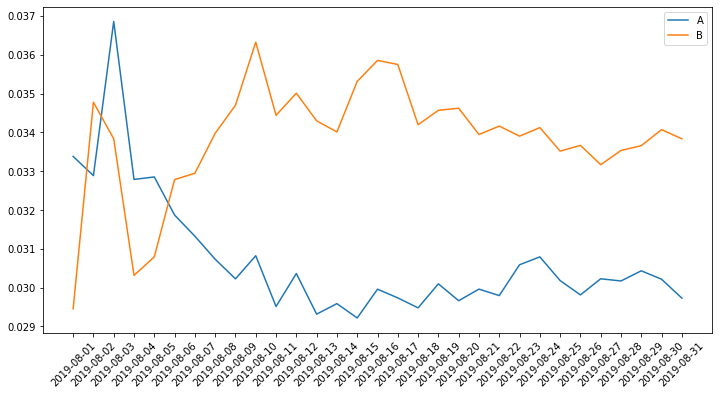

In [19]:
# menghitung konversi kumulatif

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# memilih data di kelompok A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# memilih data di kelompok B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# membuat grafik

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
ax.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
ax.legend()
plt.xticks(rotation=45)  
plt.show()

# mengatur skala sumbu

# plt.axis(['2019-04-01', '2019-04-23', 0, 0.015]) 

* Tingkat konversi untuk kelompok A mengalami lonjakan di bagian awal penelitian namun semakin berjalannya waktu, tingkat konversinya semakin turun.
* Tingkat konversi untuk kelompok B juga mengalami lonjakan di bagian awal penelitian dan semakin berjalannya waktu, tingkat konversinya cenderung naik.
* Secara umum, tingkat konversi kelompok A dan B mengalami lonjakan di bagian awal namun memiliki tingkat konversi yang berbeda seiring berjalannya waktu

No handles with labels found to put in legend.


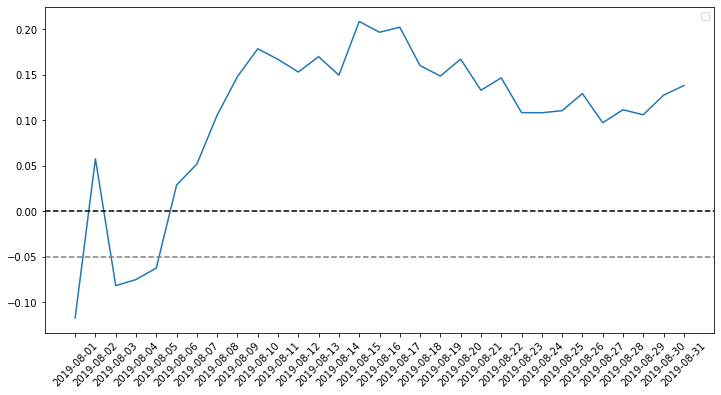

In [20]:
# perbedaan kumulatif tingkat konversi

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig, ax = plt.subplots(figsize=(12, 6)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.05, color='grey', linestyle='--')
# plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6]) 
plt.xticks(rotation=45)  
plt.show()


Pada awal pengujian, meskipun kedua kelompok mengalami lonjakan, namun tingkat konversi kelompok B masih tertinggal dibanding kelompok A. Namun seiring berjalannya waktu, kelompok B berhasil mengalami peningkatan tingkat konversi hingga bisa melampaui kelompok A

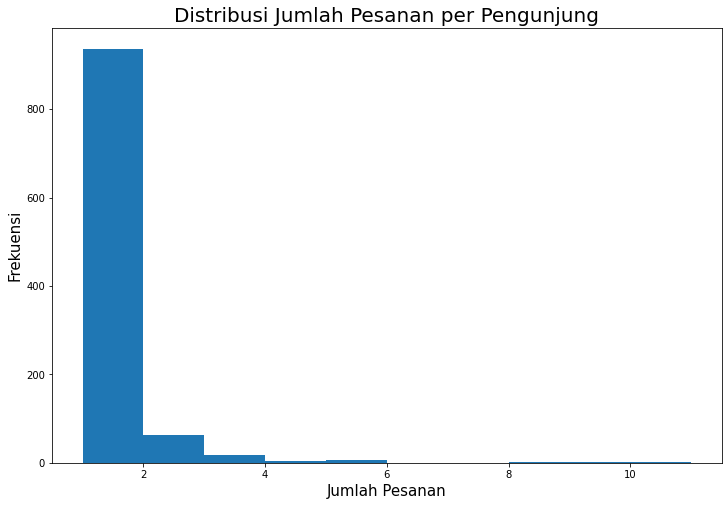

In [21]:
# diagram tebar (scatter chart) untuk jumlah pesanan per pengguna

orders_size = orders.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index().sort_values(by='transactionId')
plt.figure(figsize=(12, 8))
plt.title('Distribusi Jumlah Pesanan per Pengunjung',fontdict={'size': 20})
plt.xlabel('Jumlah Pesanan',fontdict={'size': 15})
plt.ylabel('Frekuensi',fontdict={'size': 15})
plt.hist(orders_size['transactionId']) 
plt.show()


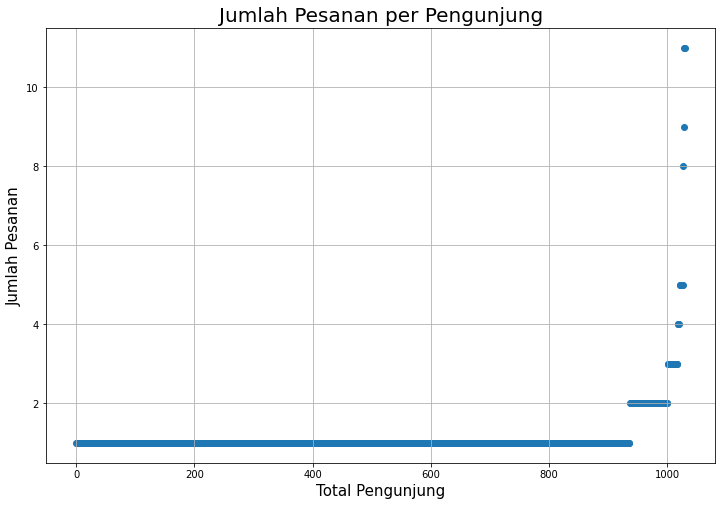

In [22]:
x_values = pd.Series(range(0, len(orders_size['transactionId'])))
plt.figure(figsize=(12, 8))
plt.grid(True)

plt.scatter(x_values, orders_size['transactionId'])
plt.title('Jumlah Pesanan per Pengunjung',fontdict={'size': 20})
plt.xlabel('Total Pengunjung',fontdict={'size': 15})
plt.ylabel('Jumlah Pesanan',fontdict={'size': 15})
plt.show()

Seperti dugaan sebelumnya, ternyata ada total pesanan > 10 namun jumlahnya hanya sedikit sekali karena sebagian besar pengunjung hanya memiliki 1 pesanan. Untuk menetapkan limit pesanan yang tidak normal, kita akan coba menghitung persentil le 95 dan 99

In [23]:
# persentil jumlah pesanan

print(np.percentile(orders_size['transactionId'], [95, 99])) 

[2. 4.]


Persentase jumlah pesanan di atas 2 tidak lebih dari 5%, sedangkan jumlah pesanan di atas 4 tidak lebih dari 1%.

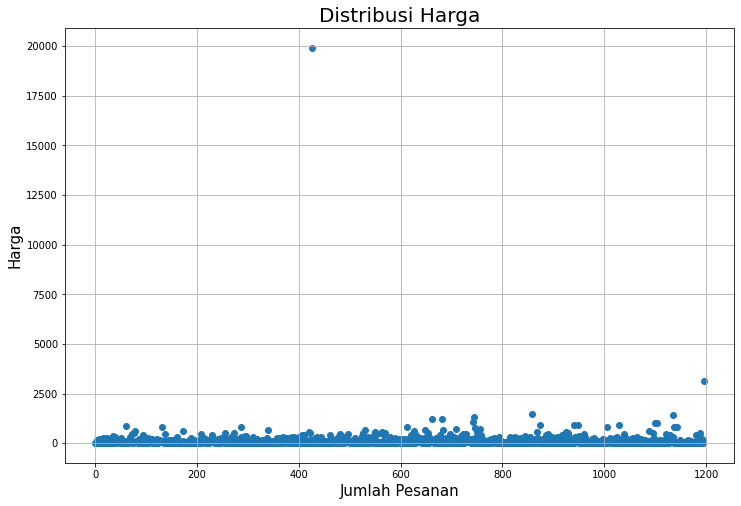

In [24]:
# diagram tebar (scatter chart) untuk harga pesanan 

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 8))
plt.grid(True)

plt.scatter(x_values, orders['revenue'])
plt.title('Distribusi Harga',fontdict={'size': 20})
plt.xlabel('Jumlah Pesanan',fontdict={'size': 15})
plt.ylabel('Harga',fontdict={'size': 15})
plt.show()

In [25]:
print(np.percentile(orders['revenue'], [95, 99])) 


[435.54  900.904]


Persentase harga pesanan di atas 435.54 tidak lebih dari 5%, sedangkan harga pesanan di atas 900.904 tidak lebih dari 1%

# Analisa Data Statistik

##  Menentukan signifikansi statistik perbedaan konversi antar kelompok  

Kita akan menghitung signifikansi statistik dari perbedaan tingkat konversi antar kelompok. Pertama kita akan membuat variabel `ordersByUsersA` dan `ordersByUsersB` yang berisi data pengguna yang setidaknya memiliki 1 pesanan dan menyimpan visitorId dan jumlah pesanan.

In [26]:
# menyimpan kolom visitor id dan jumlah pesanan

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

Selanjutnya kita akan membuat variabel baru yaitu `sampleA` dan `sampleB` yang menyimpan data pengguna dari kelompok yang berbeda dan jumlah pesanan yang sesuai. Bagi pengguna yang tidak membuat pesanan, nilainya adalah 0.

Untuk mengetahui tingkat konversi kelompok, kita harus membagi jumlah total pesanan dengan jumlah pengguna. Dengan menggunakan metode mean(), kita akan menemukan nilai rata-rata untuk sampleA

In [27]:
# menggabungkan data pengguna yang memiliki setidaknya 1 pesanan dan pengguna keseluruhan

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# menghitung probabilitas

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# menghitung tingkat konversi

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


Nilai p yang diperoleh yaitu 0,017 yang mana lebih kecil dari 0,05. Oleh karena itu, kita menolak hipotesis nol karena terdapat perbedaan yang signifikan secara statistik dalam konversi antar kelompok. Kemudian, terdapat peningkatan relatif dari kelompok B sebesar 13,8% (baris kedua dari output).

Untuk menghitung signifikansi statistik dari perbedaan ukuran pesanan rata-rata segmen, kita akan meneruskan data pendapatan ke kriteria mannwhitneyu(). Kita juga akan menemukan perbedaan relatif pada ukuran pesanan rata-rata antar kelompok.

## Menentukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah

In [28]:
# menghitung signifikansi statistik ukuran pesanan rata-rata 

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# perbedaan relatif ukuran pesanan rata-rata antar kelompok

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.692
0.252


Nilai p jauh lebih tinggi dari 0,05 sehingga kita gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya dan terdapat peningkatan relatif dari ukuran pesanan kelompok B senilai 25,2%

Selanjutnya kita akan memisahkan data yang tidak wajar sebagai pengguna yang membuat lebih dari 4 pesanan atau satu pesanan dengan nilai di atas $901

In [35]:
# membuat irisan data pengguna yang membuat lebih dari 4 pesanan dan pengguna yang membuat pesanan di atas $901
     
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis=0)

# Menggabungkan pengguna dengan pesanan mahal
usersWithExpensiveOrders = orders[orders['revenue'] > 901]['visitorId']

# Menggabungkan pengguna dengan pesanan lebih dari 4 dan pesanan mahal
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape)      

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
(15,)


Terdapat 15 pengguna yang memiliki aktifitas tidak wajar (pembelian > 4 dan 1 pembelian di atas $901)

## Menentukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter

Hal pertama yang dilakukan untuk menghitung signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter adalah menyiapkan sampel jumlah pesanan per pengguna untuk setiap kelompok uji kemudian menerapkan kriteria statistik Mann-Whitney pada sampel yang dihasilkan.

In [36]:
# menyimpan data yang telah difilter

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# menghitung signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# perbedaan relatif tingkat konversi antar kelompok yang telah difilter

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.014
0.153


Nilai p yang diperoleh yaitu 0,014 yang mana lebih kecil dari 0,05. Oleh karena itu, kita menolak hipotesis nol karena terdapat perbedaan yang signifikan secara statistik dalam konversi antar kelompok. Kemudian, terdapat peningkatan relatif dari kelompok B sebesar 15,3% setelah data difilter.

## Menentukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter

In [37]:
# menghitung signifikansi statistik ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter

print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


0.819
-0.006


Nilai p 0,819 jauh lebih tinggi dari 0,05 sehingga kita gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya dan terdapat penurunan dari ukuran pesanan kelompok B senilai 0,6% setelah data difilter.

# Kesimpulan

## Kesimpulan Analisa Data Eksploratif

* Pada metode **ICE**, **posisi pertama** ditempati **hipotesis 8** namun pada metode RICE, hipotesis 8 berada di posisi ke-5 karena nilai parameter Reach hanya 1 yang berarti tidak banyak pengguna yang akan terpengaruh oleh pembaruan yang ingin diperkenalkan
* **Hipotesis 7 menempati posisi 1 pada RICE** karena memiliki parameter Reach yang tinggi serta didukung parameter lainnya dengan nilai yang cukup tinggi
* Ternyata **pendapatan** cenderung **meningkat saat pengujian** dan terdapat **peningkatan yang cukup tajam pada kelompok B**
* Jumlah pesanan rata-rata terlihat sangat berlawanan antara kedua kelompok dari awal hingga akhir pengujian dengan **kelompok B yang memiliki jumlah pesanan lebih banyak**
* Pada awal pengujian, meskipun kedua kelompok mengalami lonjakan, namun tingkat konversi kelompok B masih tertinggal dibanding kelompok A. Namun seiring berjalannya waktu, kelompok **B berhasil mengalami peningkatan tingkat konversi hingga bisa melampaui kelompok A**
* Terdapat total pesanan > 10 namun jumlahnya hanya sedikit sekali karena **sebagian besar pengunjung hanya 
memiliki 1 pesanan**.
- Persentase jumlah pesanan di atas 2 tidak lebih dari 5%, sedangkan **jumlah pesanan di atas 4 tidak lebih dari 1%**
- Persentase harga pesanan di atas 435.54 tidak lebih dari 5%, sedangkan **harga pesanan di atas 900.904 tidak lebih dari 1%**


## Kesimpulan Analisa Data Statistik

* Perbedaan konversi antar kelompok memiliki nilai p 0,017 sehingga hipotesis nol ditolak karena **terdapat perbedaan yang signifikan secara statistik dalam konversi** antar kelompok. Kemudian, terdapat **peningkatan relatif dari kelompok B sebesar 13,8%**
* Perbedaan ukuran pesanan rata-rata antar kelompok memiliki ilai p jauh lebih tinggi dari 0,05 sehingga hipotesis nol gagal ditolak: kita **tidak bisa menyimpulkan perbedaan dalam perbedaan ukuran pesanan** dan terdapat **peningkatan relatif dari ukuran pesanan kelompok B senilai 25,2%**
* Terdapat 15 pengguna yang memiliki aktifitas tidak wajar (pembelian > 4 dan 1 pembelian di atas $901)
* **Setelah data difilter**, nilai p yang diperoleh yaitu 0,014 yang mana lebih kecil dari 0,05. Oleh karena itu hipotesis nol ditolak karena **terdapat perbedaan yang signifikan secara statistik dalam konversi** antar kelompok. Kemudian, terdapat **peningkatan relatif tingkat konversi kelompok B sebesar 15,3%** .
* **Setelah data difilter**, nilai p 0,819 jauh lebih tinggi dari 0,05 sehingga hipotesis nol gagal ditolak: **kita tidak bisa menyimpulkan perbedaan  ukuran pesanan** dan terdapat **penurunan dari ukuran pesanan kelompok B senilai 0,6%**.

## Kesimpulan Akhir

Berdasarkan data yang telah dianalisis, akan lebih baik untuk **menghentikan pengujian A/B** karena probabilitas untuk kelompok A mengungguli kelompok B sangat rendah karena dari tingkat konversi **kelompok B lebih unggul** meskipun dari segi ukuran pesanan kita tidak bisa menyimpulkan perbedaannya.